In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy import *
from math import pow
from math import sqrt

In [199]:
# 读取数据集，初始化参数
colNames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('cui_iris.txt',names=colNames)

dataset.loc[dataset['class'] == 'Iris-setosa','class']=0
dataset.loc[dataset['class'] == 'Iris-versicolor','class']=1
dataset.loc[dataset['class'] == 'Iris-virginica','class']=2

label=dataset.loc[:, ['class']]
dataset=dataset.loc[:, ['sepal-length','sepal-width', 'petal-length', 'petal-width']]
dataset_partial=dataset.loc[:, ['sepal-length','sepal-width']]

k = 3
sse = []

In [200]:
#通过随机产生的样本点初始化聚类中心
def initCentroids(dataset,k):
    m = shape(dataset)[0]
    datasetIndex = list(range(m))
    centroidsIndex = []    
    for i in range(k):
        randIndex = random.randint(0,len(datasetIndex))
        centroidsIndex.append(datasetIndex[randIndex])
        del datasetIndex[randIndex]        
    centroids = dataset.loc[centroidsIndex]
    return mat(centroids)

In [201]:
#计算两点之间的距离
def calcuDistance(a, b):
    return sqrt((a-b)*((a-b).T))

In [202]:
def kMeans(dataset, k):
    m = shape(dataset)[0]
    centroids = initCentroids(dataset, k)
    clusterAssessment = mat(zeros((m,2)))
    changeFlag = True
    iterationTime = 0
    while changeFlag:
        changeFlag = False
        for i in range(m):
            minDistance = 1000;
            clusterType = -1
            for j in range(k):
                distance = calcuDistance(dataset.values[i,:],centroids[j,:])
                if distance < minDistance:
                    minDistance = distance
                    clusterType = j
            if clusterAssessment[i,0] != clusterType:
                changeFlag = True
            clusterAssessment[i,:] =  clusterType,minDistance**2
        sse.append(sum(clusterAssessment[:,1]))
        iterationTime += 1    
        #更新均值向量
        for i in range(k):
            eachCluster = dataset.iloc[nonzero(clusterAssessment[:,0].A == i)[0]]
            centroids[i,:] = mean(eachCluster, axis=0) 
    return centroids, clusterAssessment

In [203]:
def showTrueImage(dataset,k,labels):
    num=shape(dataset)[0]
    label=['0','1','2']
    marksamples=['+r','+g','+b']
    for i in range(num): 
        plt.plot(dataset.iat[i,0],dataset.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6 )
    for i in range(0,num,50): 
        plt.plot(dataset.iat[i,0],dataset.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6,label=label[int(labels.iat[i,0])] )
#     plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
    plt.title('iris origin cluster')
    plt.show()   

In [204]:
def showPredictImage(dataset,k,centroids,clusterAssessment):
    num=shape(dataset) [0]
    marksamples=['+r','+g','+b'] 
    for i in range(num):
        markindex=int(clusterAssessment[i,0])
        plt.plot(dataset.iat[i,0],dataset.iat[i,1],marksamples[markindex],markersize=7)
    label=['0','1','2']
    c=['black','purple','orange']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],'o',markersize=12,label=label[i],c=c[i])
#         plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
    plt.title('iris predict cluster')        
    plt.show()

In [205]:
def showSSE():
    plt.title('relation between\niteration and SSE')
    plt.xlabel('iteration time')
    plt.ylabel('SSE')
    plt.plot(sse,label = 'k-means',color = 'red')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

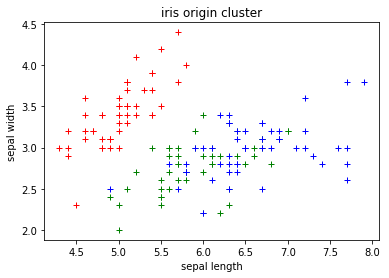

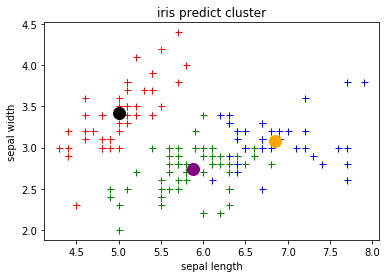

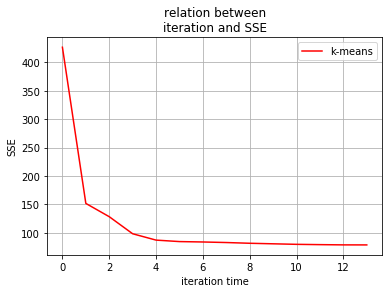

In [206]:
centroids,clusterAssessment = kMeans(dataset, k)
showTrueImage(dataset_partial,k,label)
showPredictImage(dataset_partial,k,centroids,clusterAssessment)
showSSE()